### Import Statements

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
import sys
import copy

In [2]:
%matplotlib inline

In [3]:
# converting color mode to RGB and displaying the image as matplotlib figure
def matplotlib_imshow(
    img_title="", img=None, fig_h=7, cv_colorspace_conversion_flag=cv.COLOR_BGR2RGB
):
    # tinkering with size
    try:
        img_width, img_height = img.shape[0], img.shape[1]
        aspect_ratio = img_width / img_height
        plt.figure(figsize=(fig_h * aspect_ratio, fig_h))
    except AttributeError:
        print(
            "None Type image. Correct_syntax is, matplotlib_imshow(img_title, img, fig_h, cv_colorspace_conversion_flag)."
        )

    # actual code for displaying the image
    plt.imshow(cv.cvtColor(img, cv_colorspace_conversion_flag))
    plt.title(img_title)
    plt.show()

## Morphological Transformations ([Docs]())

Morphological transformations are some simple operations based on the image shape. It is **normally performed on binary images**. It **needs two inputs**, one is our **original image**, second one is called **structuring element or kernel** which decides the nature of operation. Two basic morphological operators are **Erosion and Dilation**. Then its **variant forms** such as, **Opening, Closing, Gradient etc** also comes into play. We will see them one-by-one with help of the following image:

<img src="./imgs/abstract_black_and_white_noise.png">

**`Note:`** OpenCv treats the white pixels as the object and not the dark ones. So, when we refer to objects we are referring to the white pixels in the image.

In [4]:
abstract_noise_img = cv.imread("./imgs/abstract_black_and_white_noise.png", 0)

- ### Generating the Structural element (kernel) for morphological transformations

> `cv.getStructuringElement(kernel_shape, kernel_size)` function

<u>Function Parameters</u>
- kernel_shape: Desired shape of the kernel
    - rectangular kernel : cv.MORPH_RECT
    - elliptical kernel : cv.MORPH_ELLIPSE
    - cross-shaped kernel : cv.MORPH_CROSS
- kernel_size: in the form of a tuple (x, y)

In [5]:
rect_kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))

In [6]:
rect_kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

- ### Erosion

Erosion refers to a convolution process in which the boundaries of foreground object (Always try to keep foreground in white) is eroded. So what happens is that, all the pixels near boundary will be discarded depending upon the size of kernel. 

So in simple terms, at the boundary of the object `white region decreases in the image`. It is `useful for removing small white noises , detach two connected objects` etc.

> The `cv.erode(src, kernel, iterations)` function

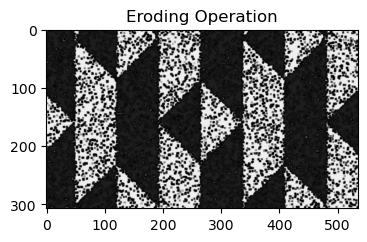

In [7]:
eroded_img = cv.erode(abstract_noise_img, rect_kernel)
matplotlib_imshow("Eroding Operation", eroded_img)

As we can see, eroding decreased white specks from inside the black segments although it also increased black noise in the white segments significantly.

- ### Dilation

Dilation is the opposite of errosion. In simple terms, at the boundary of the object `white region increases in the image`. It is `useful for black noise removal, joining broken parts of an object` etc. Dilation followed by Erosion is often used for noise removal.

> The `cv.dilate(src, kernel, iterations)` function

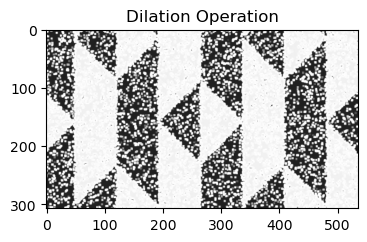

In [8]:
dilated_img = cv.dilate(abstract_noise_img, rect_kernel)
matplotlib_imshow("Dilation Operation", dilated_img)

As we can see, dilation removed most of the black specks from inside the white segments although white noise in the black segments have increased too.

- ### Opening

Opening is just another name of `erosion followed by dilation`. It is `useful in removing noise`. Because, erosion removes white noises, but it also shrinks our object. So we dilate it. Since noise is gone, they won't come back, but our object area increases.

> The `cv.morphologyEx(src, cv.MORPH_OPEN, kernel)` function

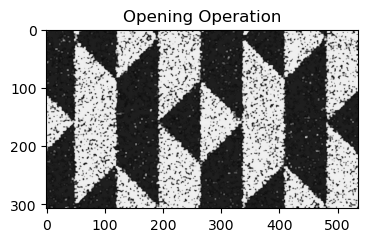

In [9]:
img_after_opening_morphology_transformation = cv.morphologyEx(
    abstract_noise_img, cv.MORPH_OPEN, rect_kernel
)
matplotlib_imshow("Opening Operation", img_after_opening_morphology_transformation)

- ### Closing

Closing is reverse of Opening, `Dilation followed by Erosion`. It is `useful in closing small holes inside the foreground objects, or small black points on the object`. 

> The `cv.morphologyEx(src, cv.MORPH_CLOSE, kernel)` function

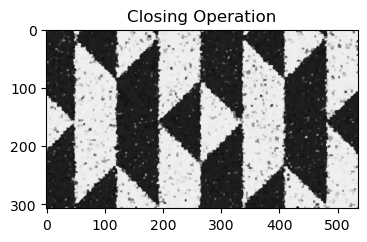

In [10]:
img_after_closing_morphology_transformation = cv.morphologyEx(
    img_after_opening_morphology_transformation, cv.MORPH_CLOSE, rect_kernel
)
matplotlib_imshow("Closing Operation", img_after_closing_morphology_transformation)

See! we have almost separated the image into distinct black and white segments.